In [59]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [60]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [61]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [63]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization,Dropout

In [64]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =32,
    image_size=(256,256)
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [65]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [66]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape =(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2),strides=2,padding = 'valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2),strides=2,padding = 'valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2),strides=2,padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [68]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 109ms/step - loss: 1.4148 - accuracy: 0.6122 - val_loss: 0.6140 - val_accuracy: 0.6534
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5685 - accuracy: 0.7139 - val_loss: 0.6159 - val_accuracy: 0.6682
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4638 - accuracy: 0.7849 - val_loss: 0.5559 - val_accuracy: 0.7366
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4508 - accuracy: 0.7960 - val_loss: 0.4695 - val_accuracy: 0.7596
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3531 - accuracy: 0.8440 - val_loss: 0.4319 - val_accuracy: 0.8056
Epoch 6/10
625/625 [==============================] - 68s 107ms/step - loss: 0.2844 - accuracy: 0.8811 - val_loss: 0.5175 - val_accuracy: 0.8180
Epoch 7/10
625/625 [==============================] - 64s 103ms/step - loss: 0.2221 - accuracy: 0.9100 - val_loss: 0.8507 - val_ac

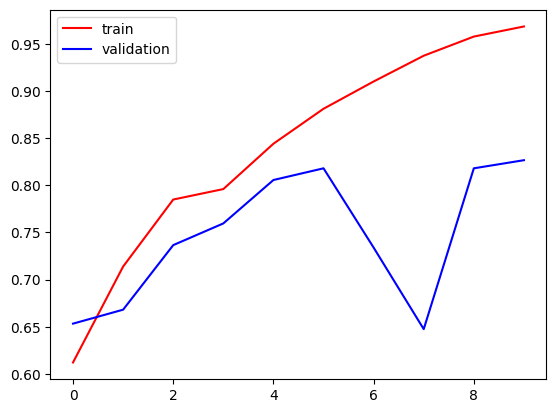

In [70]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color= 'red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

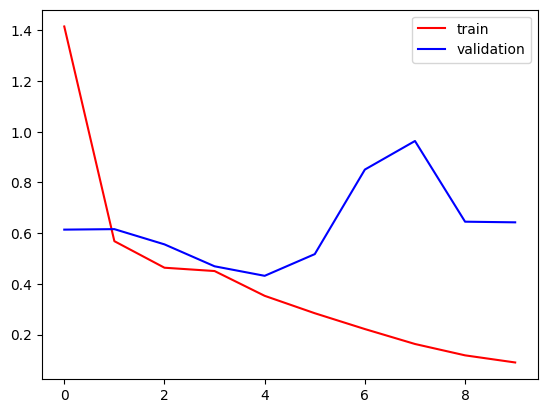

In [71]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color= 'red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [72]:
import cv2

In [79]:
test_img = cv2.imread('/content/cat1.jpg')

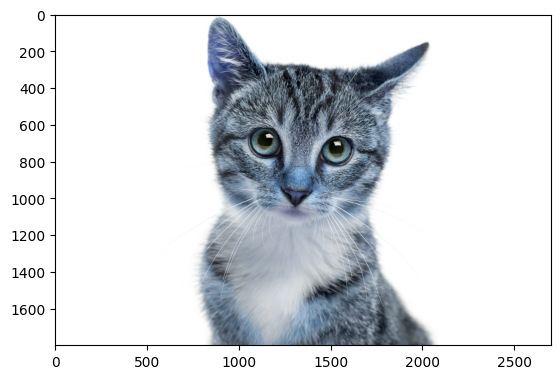

In [80]:
plt.imshow(test_img)

In [81]:
test_img.shape

(1800, 2700, 3)

In [82]:
test_img = cv2.resize(test_img,(256,256))

In [83]:
test_input = test_img.reshape(1,256,256,3)

In [85]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[9.403743e-06]], dtype=float32)